In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_delivery = pd.read_csv('../01_CSV Trabajo/df_final.csv')

In [3]:
df_delivery.head()

,grouped_category,total_onshift_partners,total_busy_partners,total_outstanding_orders,order_hour,order_day,delivery_duration
0,American,33.0,14.0,21.0,22,Friday,3779.0
1,Mexican,1.0,2.0,2.0,21,Tuesday,4024.0
2,Indian,8.0,6.0,18.0,0,Monday,1586.0
3,Italian,5.0,6.0,8.0,3,Thursday,2273.0
4,Italian,5.0,5.0,7.0,2,Tuesday,2988.0


In [4]:
# Revisar la distribución de las características numéricas y la variable objetivo
df_delivery.describe()

,total_onshift_partners,total_busy_partners,total_outstanding_orders,order_hour,delivery_duration
count,166468.000000,166468.000000,166468.000000,166468.000000,166468.000000
mean,44.659196,41.621032,57.696254,8.633719,2776.708310
std,34.477872,32.115298,52.508727,8.712715,967.289328
min,0.000000,0.000000,0.000000,0.000000,101.000000
25%,17.000000,15.000000,17.000000,2.000000,2079.000000
50%,36.000000,34.000000,40.000000,3.000000,2620.000000
75%,65.000000,62.000000,84.000000,19.000000,3309.000000
max,171.000000,154.000000,278.000000,23.000000,6405.000000


In [5]:
# Convertir la columna 'delivery_duration' de segundos a minutos
df_delivery['delivery_duration'] = df_delivery['delivery_duration'] / 60

# Verificar los primeros valores de la columna para asegurarnos de que la conversión fue correcta
df_delivery[['delivery_duration']].head()

,delivery_duration
0,62.983333
1,67.066667
2,26.433333
3,37.883333
4,49.800000


In [6]:
# Calcular el IQR (Rango Intercuartílico) de la columna 'delivery_duration'
Q1 = df_delivery['delivery_duration'].quantile(0.25)
Q3 = df_delivery['delivery_duration'].quantile(0.75)
IQR = Q3 - Q1

# Calcular los límites inferior y superior para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos eliminando los outliers
df_delivery_l = df_delivery[(df_delivery['delivery_duration'] >= lower_bound) & (df_delivery['delivery_duration'] <= upper_bound)]

# Verificar la descripción de la columna 'delivery_duration' después de eliminar outliers
df_delivery_l['delivery_duration'].describe()


count    162381.000000
mean         45.077688
std          14.379677
min           4.950000
25%          34.416667
50%          43.200000
75%          54.066667
max          85.900000
Name: delivery_duration, dtype: float64

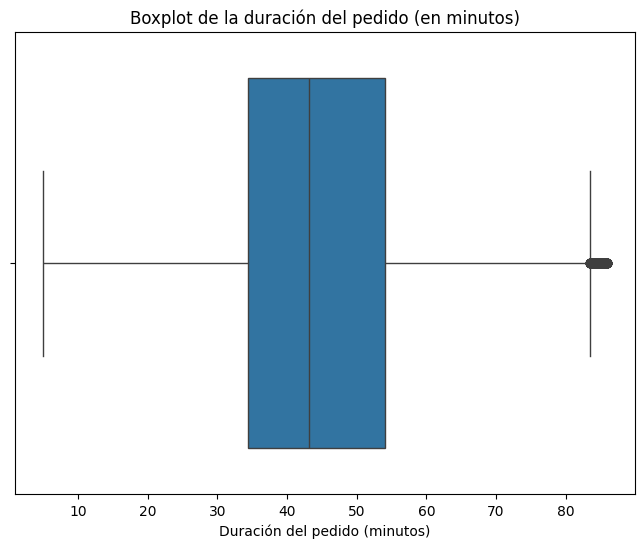

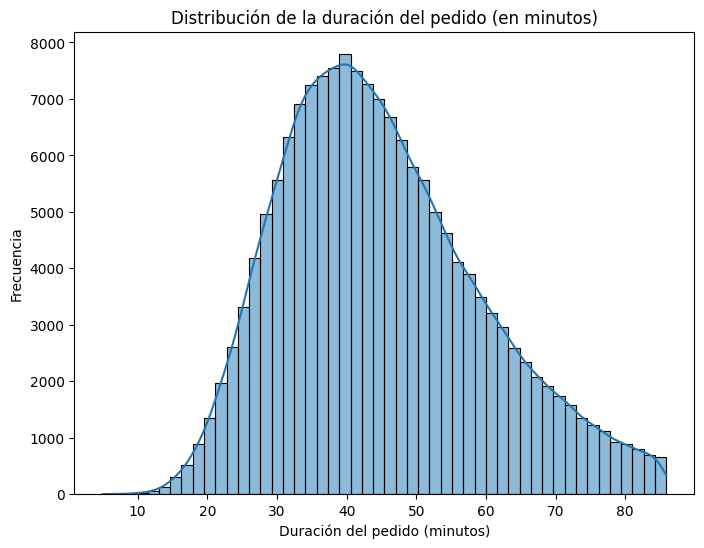

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot para visualizar los outliers de la columna 'delivery_duration'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_delivery_l, x='delivery_duration')
plt.title('Boxplot de la duración del pedido (en minutos)')
plt.xlabel('Duración del pedido (minutos)')
plt.show()

# Histograma para ver la distribución de la columna 'delivery_duration'
plt.figure(figsize=(8, 6))
sns.histplot(df_delivery_l['delivery_duration'], kde=True, bins=50)
plt.title('Distribución de la duración del pedido (en minutos)')
plt.xlabel('Duración del pedido (minutos)')
plt.ylabel('Frecuencia')
plt.show()


In [8]:
import numpy as np

# Calcular los percentiles 25 (Q1) y 75 (Q3)
Q1 = df_delivery_l['delivery_duration'].quantile(0.25)
Q3 = df_delivery_l['delivery_duration'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Definir los límites superior e inferior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Reemplazar los outliers por los valores más cercanos al rango
df_delivery_l['delivery_duration'] = np.where(df_delivery_l['delivery_duration'] < limite_inferior, limite_inferior,
                                            np.where(df_delivery_l['delivery_duration'] > limite_superior, limite_superior,
                                                     df_delivery_l['delivery_duration']))

# Verificar que no haya valores fuera del rango
print(df_delivery_l['delivery_duration'].describe())


count    162381.000000
mean         45.070636
std          14.360419
min           4.950000
25%          34.416667
50%          43.200000
75%          54.066667
max          83.541667
Name: delivery_duration, dtype: float64


/var/folders/41/9xs275yn7jxbs_h59j3pq3sw0000gn/T/ipykernel_63642/3815383851.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delivery_l['delivery_duration'] = np.where(df_delivery_l['delivery_duration'] < limite_inferior, limite_inferior,


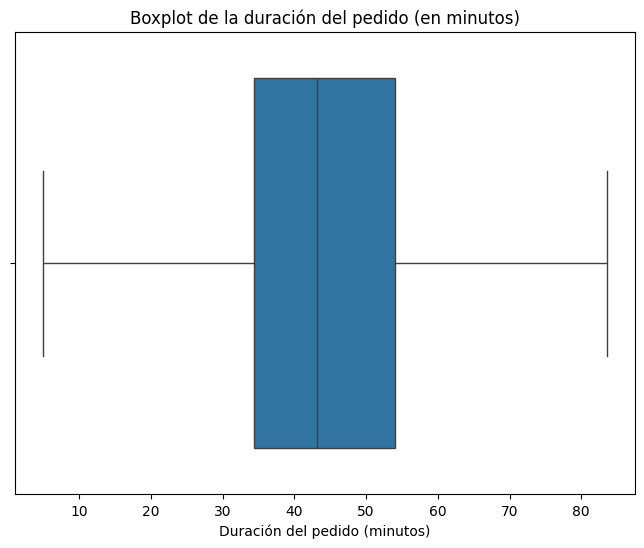

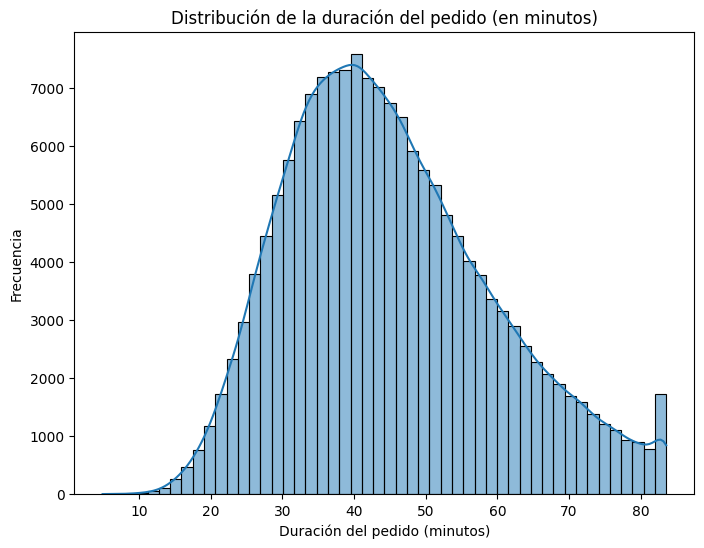

In [9]:
# Boxplot para visualizar los outliers de la columna 'delivery_duration'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_delivery_l, x='delivery_duration')
plt.title('Boxplot de la duración del pedido (en minutos)')
plt.xlabel('Duración del pedido (minutos)')
plt.show()

# Histograma para ver la distribución de la columna 'delivery_duration'
plt.figure(figsize=(8, 6))
sns.histplot(df_delivery_l['delivery_duration'], kde=True, bins=50)
plt.title('Distribución de la duración del pedido (en minutos)')
plt.xlabel('Duración del pedido (minutos)')
plt.ylabel('Frecuencia')
plt.show()

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Definir las columnas categóricas y numéricas
columnas_categoricas = ['order_day', 'grouped_category']
columnas_numericas = ['order_hour', 'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders']

# Preprocesamiento: codificar las variables categóricas y normalizar las numéricas
preprocesador = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), columnas_categoricas),  # Codificación one-hot para las categóricas
        ('num', StandardScaler(), columnas_numericas)      # Normalización de las numéricas
    ])

# Definir el modelo 
modelo_rf = RandomForestRegressor(random_state=42)

# Crear el pipeline con el preprocesador y el modelo
pipeline = Pipeline(steps=[('preprocesamiento', preprocesador),
                             ('modelo', modelo_rf)])

# Definir el espacio de búsqueda para los hiperparámetros (se elimina 'auto' de max_features)
parametros = {
    'modelo__n_estimators': [100, 200, 300, 400, 500],
    'modelo__max_depth': [5, 10, 15, 20, None],
    'modelo__min_samples_split': [2, 5, 10],
    'modelo__min_samples_leaf': [1, 2, 4],
    'modelo__max_features': ['sqrt', 'log2', None],
    'modelo__bootstrap': [True, False]
}

# Dividir los datos en conjunto de entrenamiento y prueba
X = df_delivery[['order_day', 'grouped_category', 'order_hour', 
                 'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders']]
y = df_delivery['delivery_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar RandomizedSearchCV con validación cruzada
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parametros,
    n_iter=50,
    cv=5,
    n_jobs=-1,
    random_state=42,
    scoring='r2'
)

# Entrenar el modelo con RandomizedSearchCV
random_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
mejores_parametros = random_search.best_params_
print("Mejores parámetros encontrados:", mejores_parametros)

# Evaluar el modelo con los mejores parámetros
mejor_modelo = random_search.best_estimator_
y_pred = mejor_modelo.predict(X_test)

# Calcular MSE, MAE y R² para el modelo ajustado
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)


/Users/luismgl/Library/Python/3.9/lib/python/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Mejores parámetros encontrados: {'modelo__n_estimators': 500, 'modelo__min_samples_split': 2, 'modelo__min_samples_leaf': 4, 'modelo__max_features': None, 'modelo__max_depth': 15, 'modelo__bootstrap': True}
MSE: 190.18262700809683
MAE: 10.677292423320711
R²: 0.2666848347907095


In [11]:
import joblib

# Guardo el modelo entrenado
joblib.dump(mejor_modelo, 'm_tiempo_pedido_normal.pkl')

['m_tiempo_pedido_normal.pkl']